In [1]:
from class_sample_testing import *
from main import *

### Set the folder that contains the spectral images
This folder needs to the subfolder with train data and a subfolder for each trial with the test data

In [2]:
base_folder = "./IDP Group A"
n_trials = 2
n_operators = 3

### Classify Train samples

In [3]:
train = sample_testing(folder_name=base_folder+"/train")
train_result = train.test_sample()

Processing reference...
Processing d1...
Processing d2...
Processing d3...
Processing d4...
Processing d5...
Processing d6...
Processing d7...
Processing d8...
Processing d9...
Processing d10...
Processing d11...
Processing d12...
Processing d13...
Processing d14...


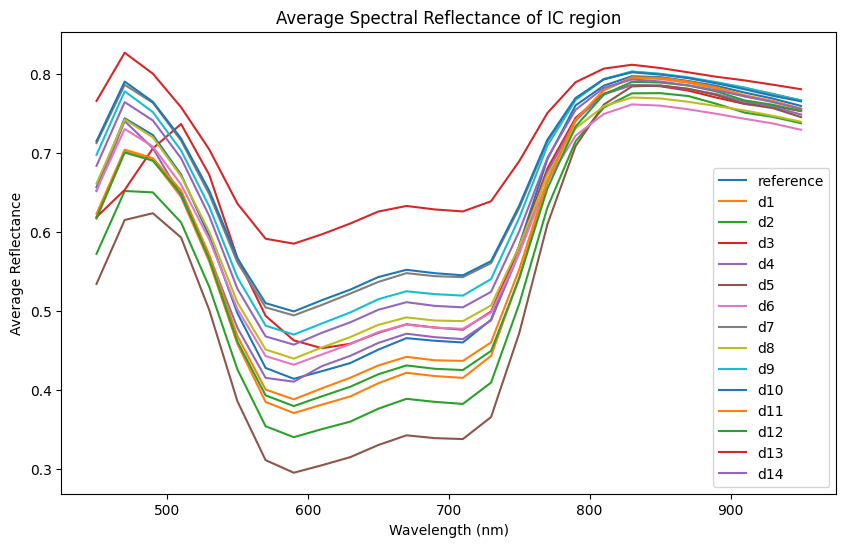

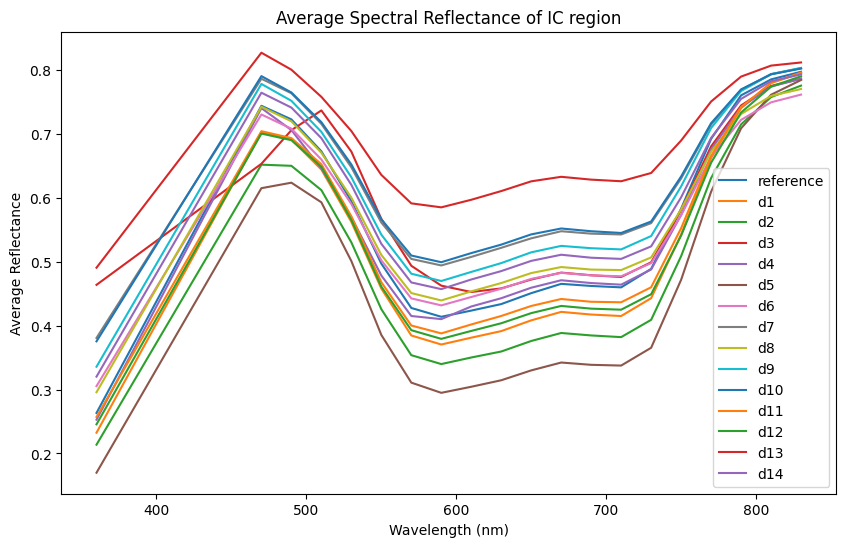

In [4]:
train.plot_average_spectras()

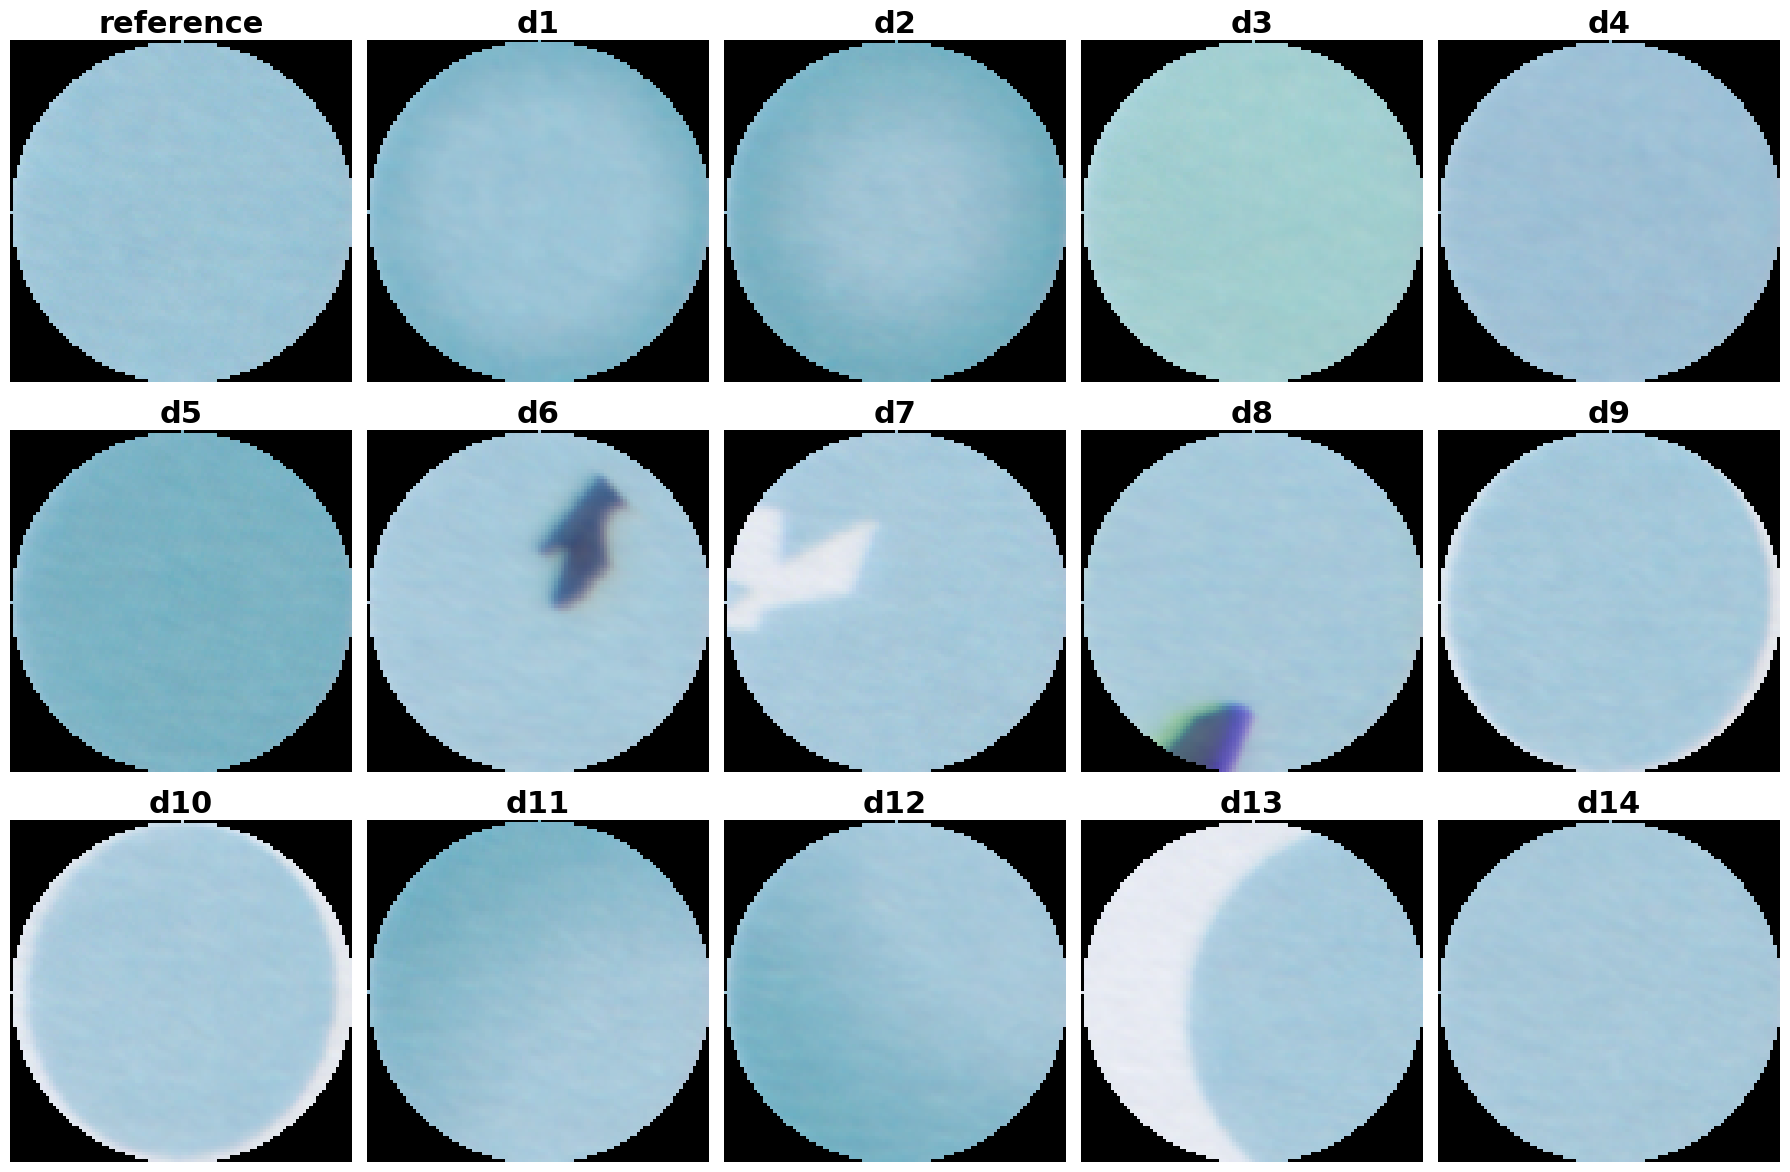

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB dat

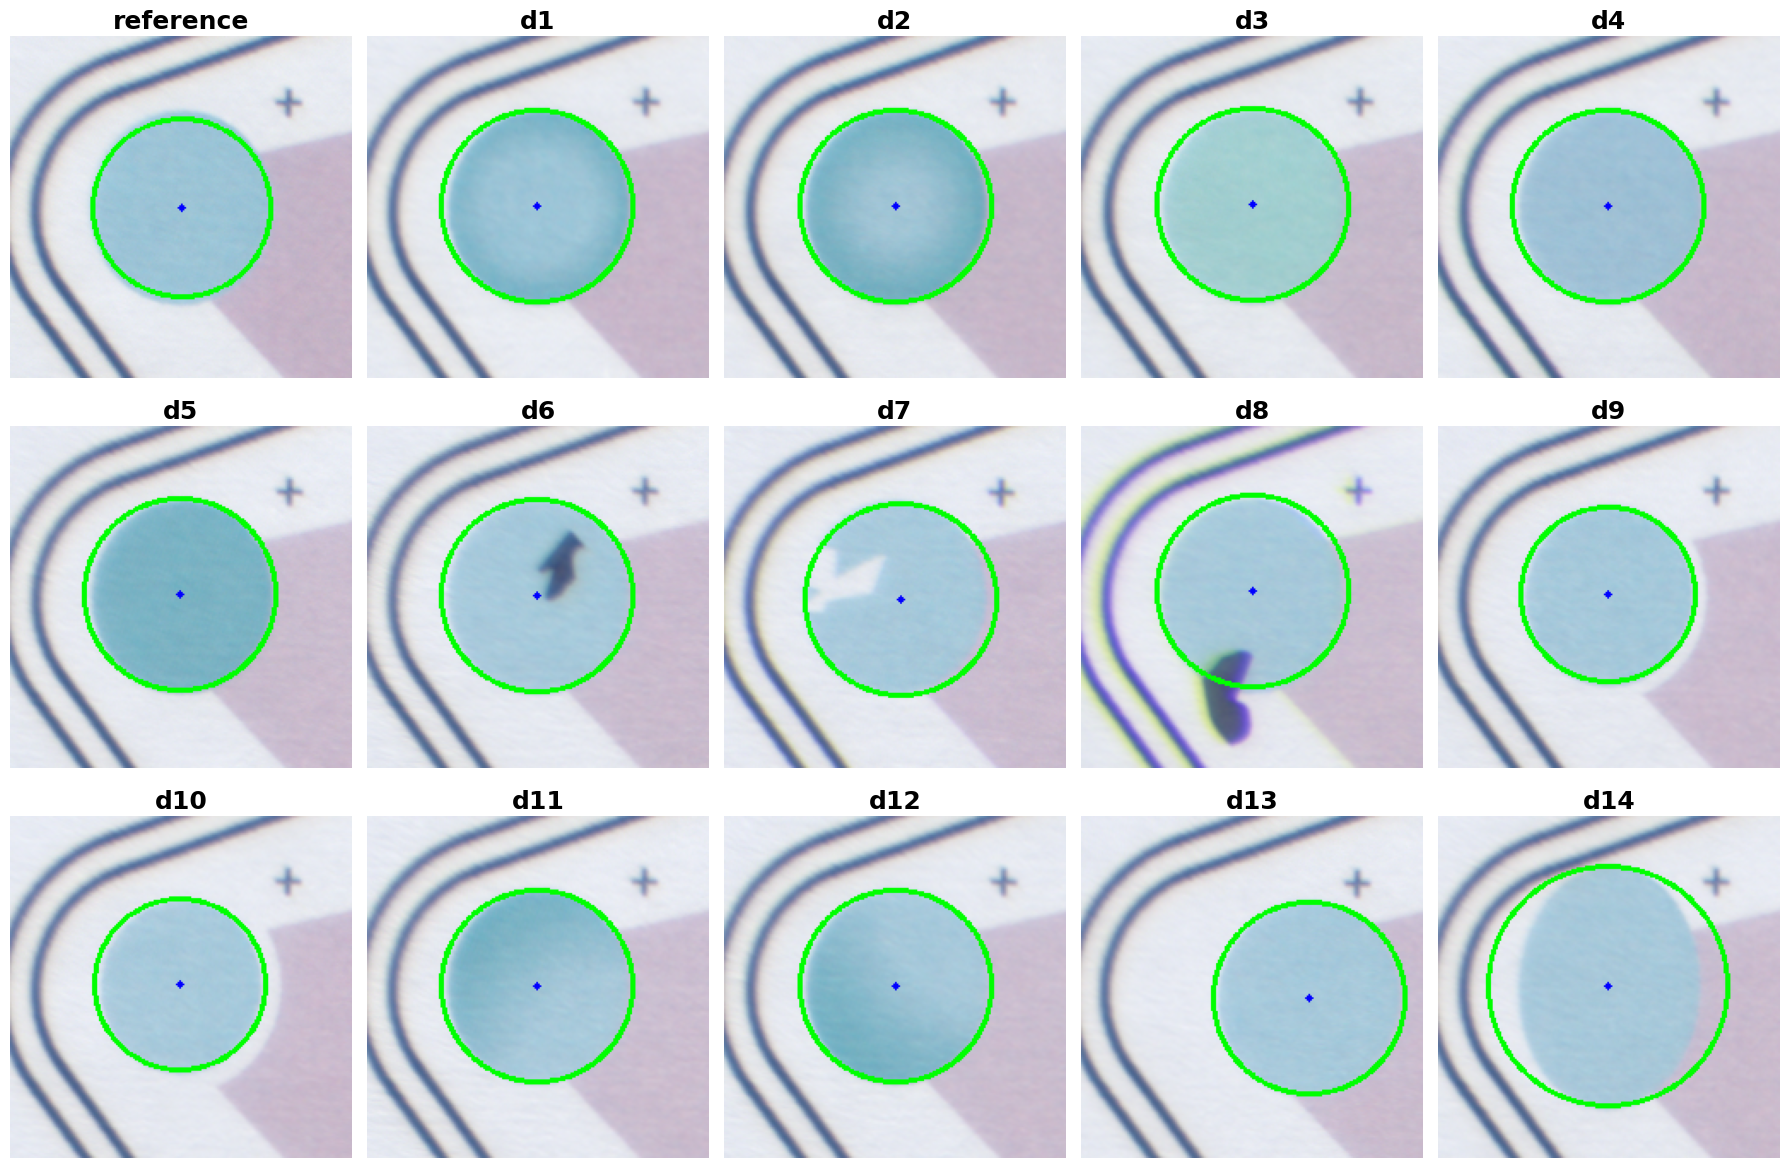

In [5]:
train.plot_IC_regions()

### Classify Test samples

In [6]:
trials_results = []
for trial in range(1,n_trials+1):
    for operator in range(1,n_operators+1):
        folder = base_folder + "/test"+ str(trial)+ "/operator"+ str(operator)
        test = sample_testing(folder_name=folder, vis=False, trial=trial, operator=operator)
        result = test.test_sample()
        trials_results.append(result)

Processing reference...
Processing s3...
Processing s4...
Processing s7...
Processing s10...
Processing s12...
Processing s13...
Processing s18...
Processing s19...
Processing s20...
Processing s21...
Processing s22...
Processing reference...
Processing s3...
Processing s4...
Processing s7...
Processing s10...
Processing s12...
Processing s13...
Processing s18...
Processing s19...
Processing s20...
Processing s21...
Processing s22...
Processing reference...
Processing s3...
Processing s4...
Processing s7...
Processing s10...
Processing s12...
Processing s13...
Processing s18...
Processing s19...
Processing s20...
Processing s21...
Processing s22...
Processing reference...
Processing s0...
Processing s3...
Processing s4...
Processing s7...
Processing s10...
Processing s12...
Processing s13...
Processing s18...
Processing s19...
Processing s20...
Processing s21...
Processing s22...
Processing reference...
Processing s0...
Processing s3...
Processing s4...
Processing s7...
Processing s10.

### Save CTQ results to excel files


In [ ]:
# Save results to excel file
train_result.to_excel("train_results.xlsx", index=False)
combined = pd.concat(trials_results, ignore_index=True)
combined.to_excel("trials_results.xlsx", index=False)

### Plot CTQ values for Train samples

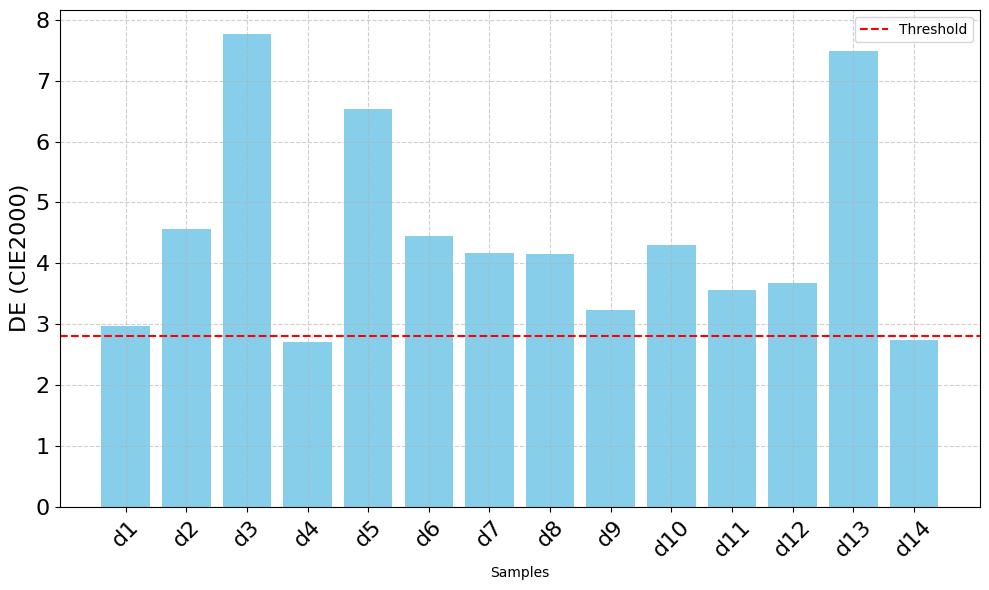

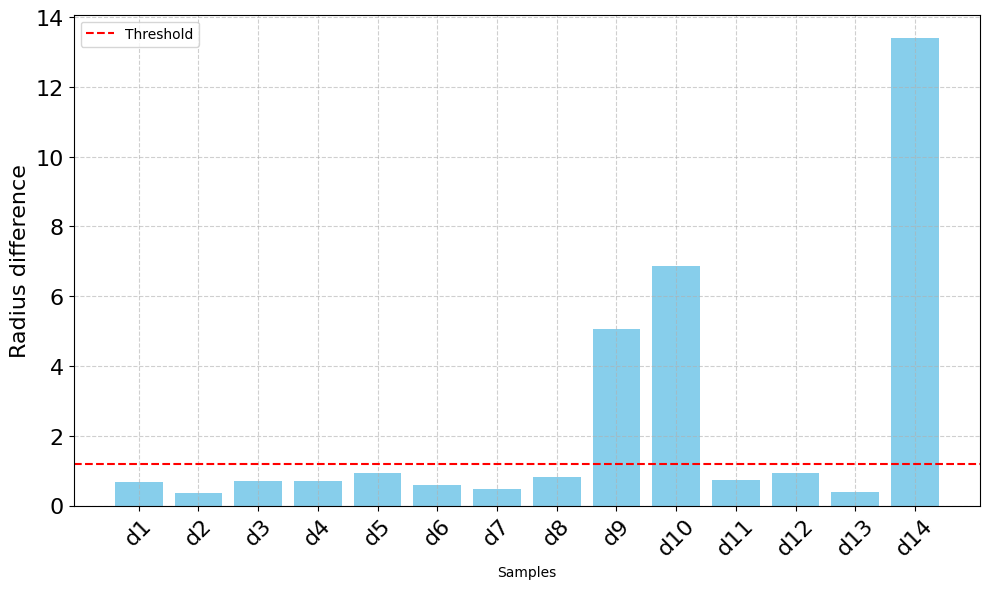

In [5]:
t_deltae = train_result["DE_mean"].values 
t_radii = train_result["D_radius"].values 
plot_ctq_values_train(t_deltae, train.sample_folders, 2.8, "Average Color Difference Between Reference and Defects", "DE (CIE2000)")
plot_ctq_values_train(t_radii, train.sample_folders, 1.2, "Radius Difference Between Reference and Defects", "Radius difference")

### Plot CTQ values for Test samples

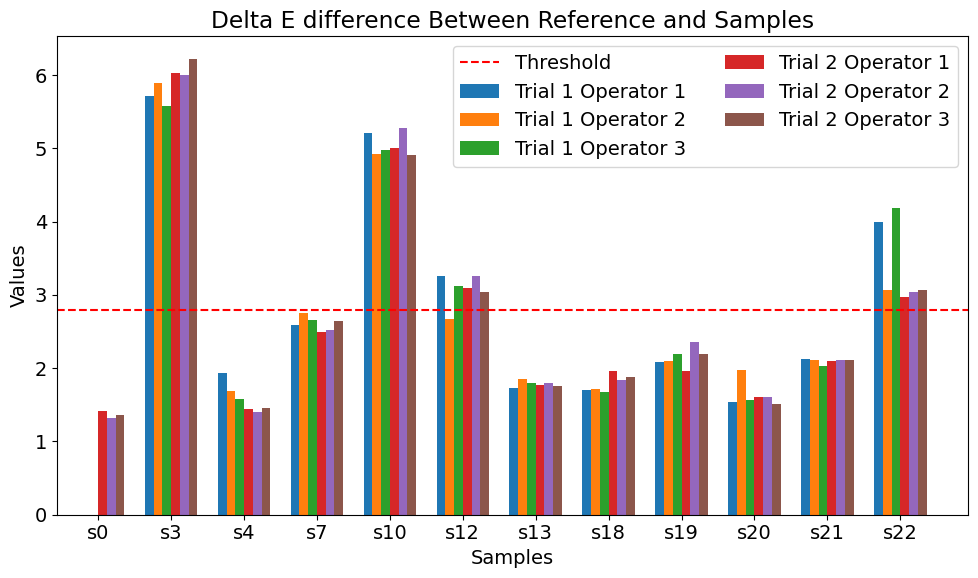

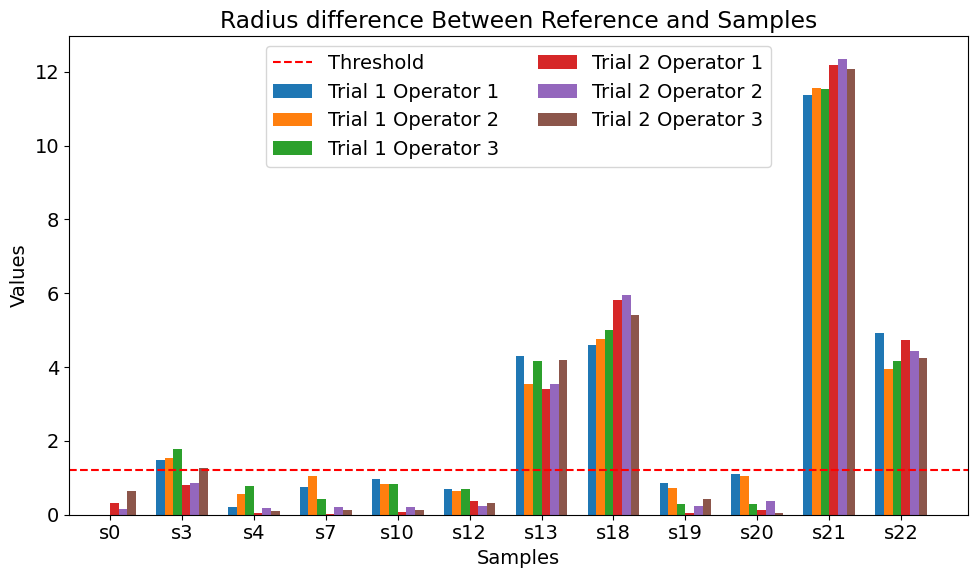

In [ ]:
samples_including_s0 = test.sample_folders
all_deltae = [t["DE_mean"].values for t in trials_results]
all_radius = [t["D_radius"].values for t in trials_results]

all_deltae = [np.insert(x, 0, np.nan) if len(x) < len(samples_including_s0) else x for x in all_deltae ]
all_radius = [np.insert(x, 0, np.nan) if len(x) < len(samples_including_s0) else x for x in all_radius ]

variances1 = np.nanvar(all_deltae, axis=0)
variances2 = np.nanvar(all_radius, axis=0)

plot_ctq_values(
    all_deltae,
    "Delta E difference Between Reference and Samples",
    2.8,
    samples_including_s0,
     "DE (CIE2000)"
)
plot_ctq_values(
    all_radius,
    "Radius difference Between Reference and Samples",
    1.2,
    samples_including_s0,
    "Radius difference"
)